In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy
%matplotlib inline

In [7]:
# getting raw data
trial_data = []
debrief_data = []

for line in open('trials_data_p_all.json', 'r'):
    trial_data.append(json.loads(line))
for line in open('debriefs_data_p_all.json', 'r'):
    debrief_data.append(json.loads(line))

In [8]:
print(len(debrief_data))

91


In [9]:
# transforming data into one dictionary with token_id as keys for pp data
trial_data_id = {}
for trial in trial_data:
    id = trial["token_id"]
    if id not in trial_data_id.keys():
        trial_data_id[id] = []
    if trial not in trial_data_id[id]:
        trial_data_id[id].append(trial)

In [10]:
# checking how many workers completed the task and computing their bonus. 
# appends details to a bash script that can be executed through aws from terminal 
# completion
boni = {}
batch_results = pd.read_csv('batch_results_p_all.csv')
# reduced data for participants that completed the task 
trial_data_completed = {}

# create bash script headline
with open ('bonus_results_p_all.sh', 'w') as rsh:
    bash = '''"#! /bin/bash"'''
    rsh.write(bash)
    
for token in trial_data_id:
    boni = {}
    if len(trial_data_id[token]) == 10:
        boni[token] = 0
        trial_data_completed[token] = {}
        for trial in range(0, len(trial_data_id[token])):
            if trial_data_id[token][trial]["posteriorORprior"] == 'post':
                boni[token] += (sum(trial_data_id[token][trial]['selected'][:4]) * 5 + (4 - sum(trial_data_id[token][trial]['selected'][4:])))  / 100
                boni[token] = round(boni[token],2)
#     print('hi')
        if len(batch_results[batch_results['Answer.surveycode']==token]) == 1:
            location = batch_results[batch_results['Answer.surveycode']==token].index.item()
    #         print(location)
            worker_id = batch_results.loc[location, 'WorkerId']
            assignment_id = batch_results.loc[location, 'AssignmentId']
            print(str(boni[token]))
            print(token)
            print(boni)
            print(token)
            bonus_amount = str(boni[token])
            total_bonus = str(boni[token])

            with open ('bonus_results_p_all.sh', 'a') as rsh:
                bash ="\naws mturk send-bonus --worker-id " + worker_id + " --bonus-amount " + total_bonus + " --assignment-id " + assignment_id + " --reason  '" + "$" + bonus_amount + " bonus for your performance during the Challenging Science Game hit'"
                rsh.write(bash)


0.87
wHjhL
{'wHjhL': 0.87}
wHjhL
0.9
ZECTn
{'ZECTn': 0.9}
ZECTn
0.66
qEOSD
{'qEOSD': 0.66}
qEOSD
0.36
2ZlW3
{'2ZlW3': 0.36}
2ZlW3
0.77
rTu4H
{'rTu4H': 0.77}
rTu4H
0.33
4F753
{'4F753': 0.33}
4F753
0.88
AYXpS
{'AYXpS': 0.88}
AYXpS
0.94
JATf9
{'JATf9': 0.94}
JATf9
0.72
QgoZL
{'QgoZL': 0.72}
QgoZL
1.02
4hBLT
{'4hBLT': 1.02}
4hBLT
0.15
FjM03
{'FjM03': 0.15}
FjM03
0.81
tGNdP
{'tGNdP': 0.81}
tGNdP
0.96
3x2t1
{'3x2t1': 0.96}
3x2t1
1.02
HSmD4
{'HSmD4': 1.02}
HSmD4
0.45
CLwdn
{'CLwdn': 0.45}
CLwdn
0.33
seghl
{'seghl': 0.33}
seghl
0.39
9cMOT
{'9cMOT': 0.39}
9cMOT
0.39
jUCAC
{'jUCAC': 0.39}
jUCAC
0.65
6jBfW
{'6jBfW': 0.65}
6jBfW
0.6
P7FU1
{'P7FU1': 0.6}
P7FU1
0.94
HMsR4
{'HMsR4': 0.94}
HMsR4
0.79
uR94z
{'uR94z': 0.79}
uR94z
1.03
x0d4k
{'x0d4k': 1.03}
x0d4k
1.04
Ft3Te
{'Ft3Te': 1.04}
Ft3Te
0.33
H1cpa
{'H1cpa': 0.33}
H1cpa
0.38
9v22G
{'9v22G': 0.38}
9v22G
0.55
18SWe
{'18SWe': 0.55}
18SWe
0.66
BGTlt
{'BGTlt': 0.66}
BGTlt
0.21
VNO0H
{'VNO0H': 0.21}
VNO0H
1.19
Ppbut
{'Ppbut': 1.19}
Ppbut
0.33
jpl7c
{'j

In [8]:
# creating a new data frame more convenient for analysis 
df_zendo = pd.DataFrame({"token_id": [], 
                         "rule_name": [], 
                         "rule_description": [], 
                         "prior": [], 
                         "posterior": [], 
                         "prior_accuracy": [], 
                         "posterior_accuracy": [], 
                         "prior_feedback": [], 
                         "posterior_feedback": [],
                         "data": []})


# rule details 
rules = ["Rule1", "Rule2", "Rule3", "Rule4", "Rule5", "Rule6", "Rule7", "Rule8", "Rule9", "Rule10"]
rule_names = ['Zeta' ,'Phi' ,'Upsilon' ,'Iota' ,'Kappa' ,'Omega' ,'Mu' ,'Nu' ,'Xi', 'Psi']
rule_descriptions = ['there is a red', 
                     'they are all the same size', 
                     'none are upright', 
                     'one is blue', 
                     'at least one is blue AND small', 
                     'all are blue OR small',
                     'a red is bigger than all nonreds', 
                     'contact', 
                     'blue to red contact', 
                     'stacked']

ground_truth = [True,True,True,True,False,False,False,False]


for token in trial_data_id:
    
    if len(trial_data_id[token]) == 10:
        print(token)
     
        for trial in trial_data_id[token]:

            if trial["posteriorORprior"] == 'prior':
                rule_name = trial['rule']
                rule_description = rule_descriptions[rule_names.index(rule_name)]
                prior = trial['selected']
                prior_feedback = trial['ph4_answer']
                prior_accuracy = (sum(prior[:4]) + (4 - sum(prior[4:]))) / len(prior)
                data_prior = trial['data']
            elif trial["posteriorORprior"] == 'post':
                posterior = trial['selected']
                posterior_accuracy = (sum(posterior[:4]) + (4 - sum(posterior[4:]))) / len(posterior)
                posterior_feedback = trial['ph4_answer']
                data_post = trial['data']


                match = [a and b or not a and not b for a, b in zip(prior, posterior)]

                match_perc = sum(match) / len(match)

                match_acc = sum([a and b and c or not a and not b and not c for a,b,c in zip(prior, posterior, ground_truth)]) / len(prior)

                prior_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(prior, posterior, ground_truth)]) / len(prior)
                post_alone_acc = sum([a and not b and c or not a and b and not c for a,b,c in zip(posterior, posterior, ground_truth)]) / len(prior)
                prior_alone = [a and not b or not a and b for a,b in zip(prior, posterior)]
                posterior_alone = [a and not b or not a and b for a,b in zip(posterior, posterior)]
                prior_alone_perc = sum(prior_alone) / len(prior_alone)
                post_alone_perc = sum(posterior_alone) / len(posterior_alone)

                # now checking how subjects imporved if initially good vs bad 
    #             if prior_accuracy >= posterior_accuracy:
                delta_high_acc = posterior_accuracy - prior_accuracy
    #             elif prior_accuracy < posterior_accuracy:
                delta_low_acc = prior_accuracy - posterior_accuracy

                prior_select_alone = [a and not b for a, b in zip(prior, posterior)]
                posterior_select_alone = [a and not b for a, b in zip(posterior, prior)]




                df_zendo = df_zendo.append(pd.DataFrame({"token_id": [token], 
                                                         "rule_name": [rule_name], 
                                                         "rule_description": [rule_description], 
                                                         "prior": [prior], 
                                                         "posterior": [posterior], 
                                                         "prior_accuracy": [prior_accuracy], 
                                                         "posterior_accuracy": [posterior_accuracy], 
                                                         "prior_feedback": [prior_feedback], 
                                                         "posterior_feedback": [posterior_feedback],
                                                         "data_prior": [data_prior],
                                                         "data_posterior": [data_post],
                                                         


                                                          "match": [match],





                                                             "match_perc": [match_perc],

                                                             "match_acc": [match_acc],

                                                             "prior_alone_acc": [prior_alone_acc],
                                                             "posterior_alone_acc": [post_alone_acc],
                                                             "delta_low_acc": [delta_low_acc],
                                                             "delta_high_acc": [delta_high_acc],
                                                             "prior_alone_perc": [prior_alone_perc],
                                                             "posterior_alone_perc": [post_alone_perc],
                                                                'trust': [trust],
                                                         'exp': [expertise],





                                                        }), ignore_index=True, sort=False)





df_zendo.to_csv('main_data_formatted_cond_3_exp.csv')


zpq47


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
1.0
1.0
0.625
1.0
0.375
0.625
0.5
0.75
0.625
1.0
0.625
1.0
0.75
0.75
1.0
1.0
0.625
0.625
0.375
0.375
0.625
0.625
0.625
0.75
0.375
0.25
0.25
0.625
0.75
0.875
0.75
0.75
0.625
1.0
0.75
0.375
0.625
1.0
1.0
1.0
0.75
0.75
0.5
0.625
1.0
1.0
0.375
0.375
1.0
1.0
0.75
0.75
0.625
0.625
0.625
0.5
0.625
1.0
0.125
0.75
0.75
0.625
0.625
1.0
0.625
0.625
0.625
0.875
0.625
0.625
0.375
0.375
0.875
1.0
0.75
0.75
0.25
0.25
0.625
1.0
1.0
1.0
0.625
0.625
0.5
0.5
0.625
0.625
0.5
0.625
0.5
0.625
0.75
0.5
0.25
0.625
0.625
1.0
1.0
1.0
0.625
0.625
0.5
0.625
0.625
0.625
1.0
1.0


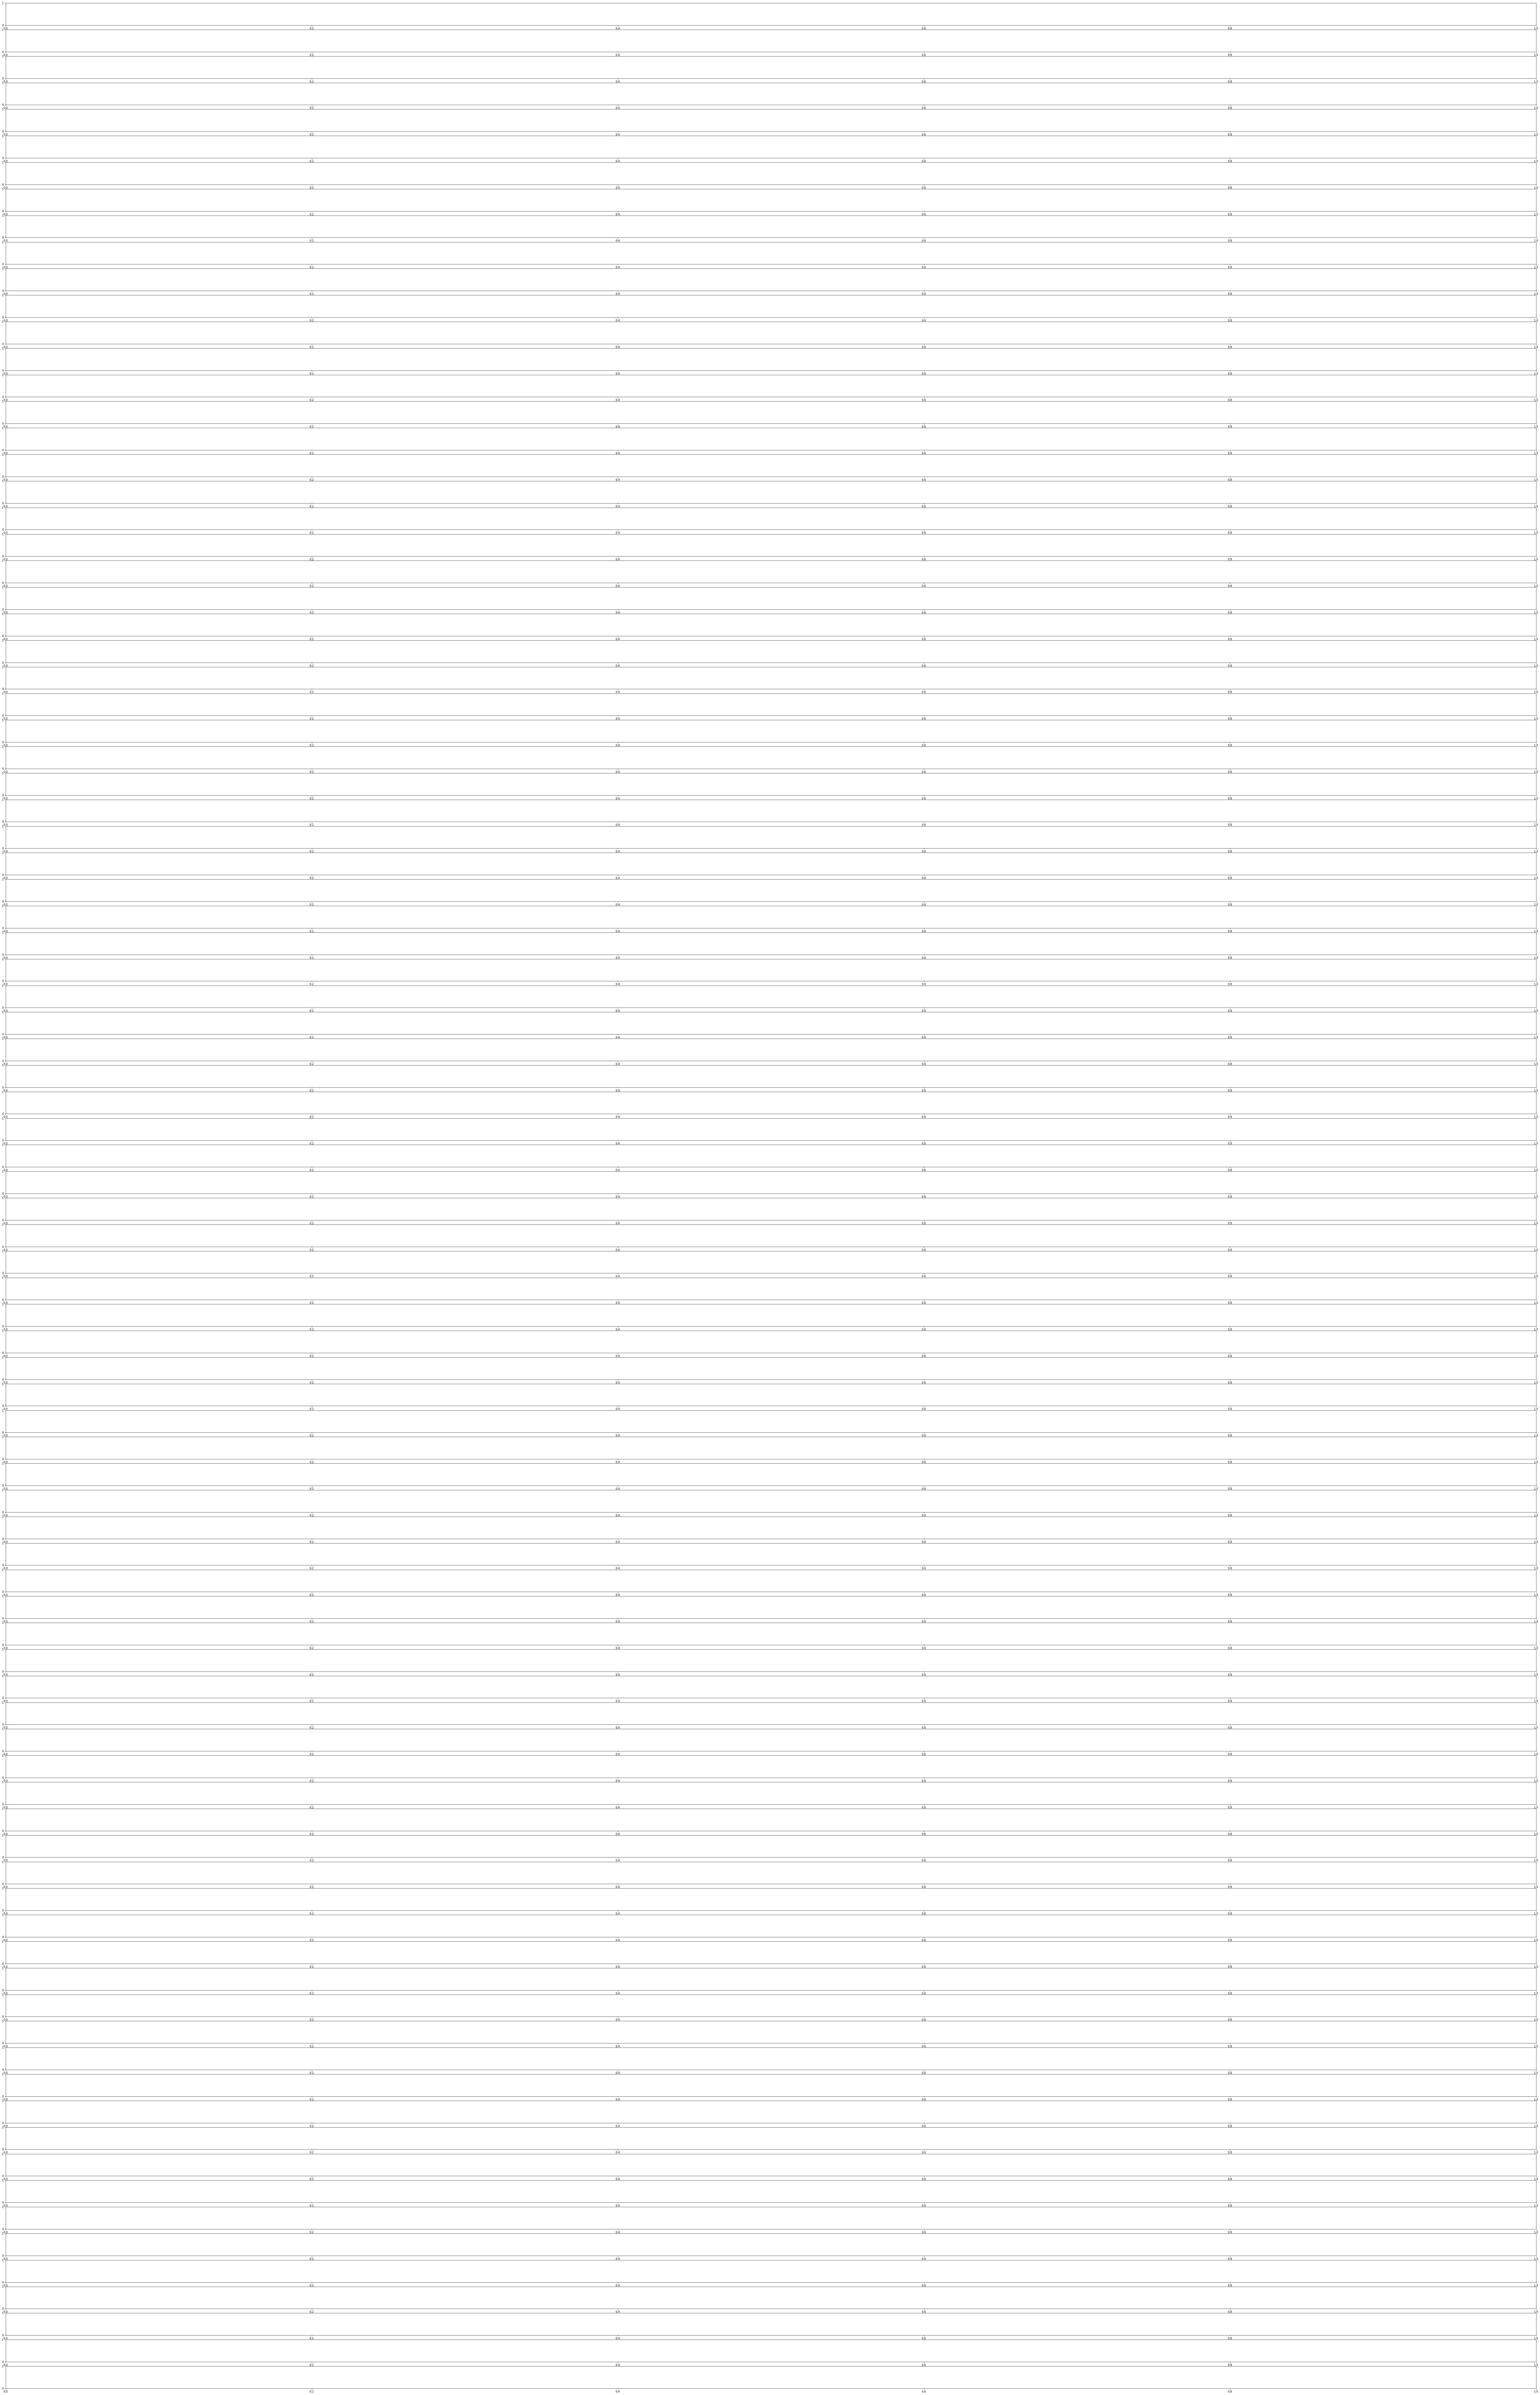

In [2]:
# plotting prior and posterior accuracy
df_zendo = pd.read_csv('normative_res_one_0_c1_10k.csv')

token_ids = df_zendo['token_id']
token_ids = list(dict.fromkeys(token_ids))
# from matplotlib.backends.backend_pdf import PdfPages
# pp = PdfPages('multipage.pdf')


fig, ax = plt.subplots(90,1,figsize=(100,160))
x = np.arange(5)
width = 0.05

# specific rules
prior_acc_zeta = []
prior_acc_kappa = []
prior_acc_iota = []
prior_acc_omega = []
prior_acc_upsilon = []
post_acc_zeta = []
post_acc_kappa = []
post_acc_iota = []
post_acc_omega = []
post_acc_upsilon = []




  
# general stuff
prior_acc = []
feedback_1 = []
post_acc = []
feedback_2 = []
names = []
prior_match_perc = []
posterior_match_perc = []

prior_alone_perc = []
posterior_alone_perc = []

prior_match_acc = []
posterior_match_acc = []
prior_alone_acc = []
posterior_alone_acc = []

d_low_acc = []
d_high_acc = []
plt.rcParams.update({'font.size': 25})

count = 0


for subj in range(0, int(len(df_zendo['rule_description'])/5)):  
    if len(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist()) == 5:
        print(count)
        count+=1
#         print(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
#     if len(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist()) == 5:

        names.append(df_zendo['rule_description'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        prior_acc.append(df_zendo['prior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        feedback_1.append(df_zendo['prior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        feedback_2.append(df_zendo['posterior_feedback'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        post_acc.append(df_zendo['posterior_accuracy'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        prior_alone_perc.append(df_zendo['prior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        posterior_alone_perc.append(df_zendo['posterior_alone_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        prior_match_perc.append(df_zendo['match'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    #     posterior_match_perc.append(df_zendo['posterior_match_perc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        prior_match_acc.append(df_zendo['match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
    #     posterior_match_acc.append(df_zendo['posterior_match_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        prior_alone_acc.append(df_zendo['prior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        posterior_alone_acc.append(df_zendo['posterior_alone_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        d_low_acc.append(df_zendo['delta_low_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
        d_high_acc.append(df_zendo['delta_high_acc'].loc[df_zendo['token_id'] == token_ids[subj]].tolist())
#         if df_zendo['rule_name'][subj] == 'Zeta':
#             prior_acc_zeta.append(df_zendo['prior_accuracy'][subj])
#             post_acc_zeta.append(df_zendo['posterior_accuracy'][subj])
#         elif df_zendo['rule_name'][subj] == 'Kappa':
#             prior_acc_kappa.append(df_zendo['prior_accuracy'][subj])
#             post_acc_kappa.append(df_zendo['posterior_accuracy'][subj])
#         elif df_zendo['rule_name'][subj] == 'Iota':
#             prior_acc_iota.append(df_zendo['prior_accuracy'][subj])
#             post_acc_iota.append(df_zendo['posterior_accuracy'][subj])
#         elif df_zendo['rule_name'][subj] == 'Omega':
#             prior_acc_omega.append(df_zendo['prior_accuracy'][subj])
#             post_acc_omega.append(df_zendo['posterior_accuracy'][subj])
#         elif df_zendo['rule_name'][subj] == 'Upsilon':
#             prior_acc_upsilon.append(df_zendo['prior_accuracy'][subj])
#             post_acc_upsilon.append(df_zendo['posterior_accuracy'][subj])
#       
    
    
#     prior_a_rect = ax[subj].bar(x - 0.275, prior_acc[subj], width, label="prior_accuracy")
#     post_a_rect = ax[subj].bar(x - 0.225, post_acc[subj], width, label="posterior_accuracy")
# #     prior_ap_rect = ax[subj].bar(x - 0.175, prior_alone_perc[subj], width, label="prior_alone_perc")
# #     post_ap_rect = ax[subj].bar(x - 0.125, posterior_alone_perc[subj], width, label="post_alone_perc")
# #     prior_mp_rect = ax[subj].bar(x - 0.075, prior_match_perc[subj], width, label="prior_union_perc")
#     post_mp_rect = ax[subj].bar(x - 0.025, posterior_match_perc[subj], width, label="post_union_perc")
#     prior_ap_a_rect = ax[subj].bar(x + 0.025, prior_alone_acc[subj], width, label="prior_alone_accuracy")
#     post_ap_a_rect = ax[subj].bar(x + 0.075, posterior_alone_acc[subj], width, label="post_alone_accuracy")
#     prior_mp_a_rect = ax[subj].bar(x + 0.125, prior_match_acc[subj], width, label="prior_union_accuracy")
#     post_mp_a_rect = ax[subj].bar(x + 0.175, posterior_match_acc[subj], width, label="posterior_union_accuracy")
#     d_low_a_rect = ax[subj].bar(x + 0.225, d_low_acc[subj], width, label="d_low_accuracy")
#     d_high_a_rect = ax[subj].bar(x + 0.275, d_high_acc[subj], width, label="d_high_accuracy")

    
    
    
#     ax[subj].set_ylabel('percentage', size=30, color="red")
#     ax[subj].set_title("id: " + token_ids[subj], color="red", size=50)
#     ax[subj].set_xticks(x)
#     ax[subj].set_xticklabels(names[subj])
#     ax[subj].tick_params(axis='x', colors='red')
#     ax[subj].tick_params(axis='y', colors='red')
#     ax[subj].legend()
#     fig.tight_layout()
for subj in range(0, len(df_zendo['token_id'])):
    if df_zendo['rule_name'][subj] == 'Zeta':
        prior_acc_zeta.append(df_zendo['prior_accuracy'][subj])
        post_acc_zeta.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Kappa':
        prior_acc_kappa.append(df_zendo['prior_accuracy'][subj])
        post_acc_kappa.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Iota':
        print(df_zendo['prior_accuracy'][subj])
        print(df_zendo['posterior_accuracy'][subj])
        prior_acc_iota.append(df_zendo['prior_accuracy'][subj])
        post_acc_iota.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Omega':
        prior_acc_omega.append(df_zendo['prior_accuracy'][subj])
        post_acc_omega.append(df_zendo['posterior_accuracy'][subj])
    elif df_zendo['rule_name'][subj] == 'Upsilon':
        prior_acc_upsilon.append(df_zendo['prior_accuracy'][subj])
        post_acc_upsilon.append(df_zendo['posterior_accuracy'][subj])

# print(len(d_low_acc))



In [3]:
print(len(d_low_acc))
print(np.mean(d_low_acc))

24
-0.07708333333333334


TypeError: cannot perform reduce with flexible type

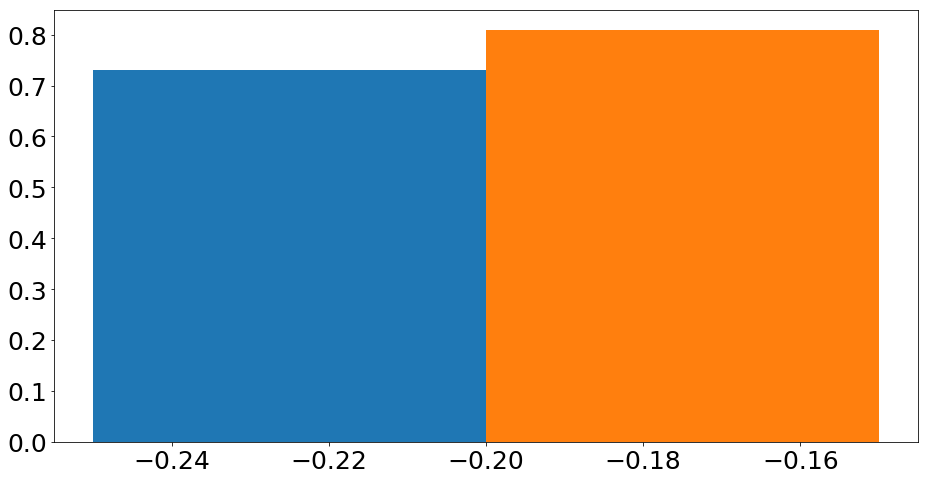

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x = np.arange(1)
plt.rcParams.update({'font.size': 10})

width = 0.05
# print(len(prior_acc))
prior_a_rect = ax.bar(x - 0.225, np.mean(prior_acc), width, label="prior_accuracy")
post_a_rect = ax.bar(x - 0.175, np.mean(post_acc), width, label="posterior_accuracy")

# prior_ap_rect = ax.bar(x - 0.125, np.mean(prior_alone_perc), width, label="prior_alone_perc")
# post_ap_rect = ax.bar(x - 0.075, np.mean(posterior_alone_perc), width, label="post_alone_perc")
# print(prior_match_perc)                      
prior_mp_rect = ax.bar(x - 0.025, np.mean(prior_match_perc), width, label="union_perc")
# post_mp_rect = ax.bar(x + 0.025, np.mean(posterior_match_perc), width, label="post_union_perc")

# prior_ap_a_rect = ax.bar(x + 0.075, np.mean(prior_alone_acc), width, label="prior_alone_accuracy")
# post_ap_a_rect = ax.bar(x + 0.125, np.mean(posterior_alone_acc), width, label="post_alone_accuracy")

prior_mp_a_rect = ax.bar(x + 0.175, np.mean(prior_match_acc), width, label="union_accuracy")
# post_mp_a_rect = ax.bar(x + 0.225, np.mean(posterior_match_acc), width, label="posterior_union_accuracy")

d_low_a_rect = ax.bar(x + 0.375, np.mean(d_low_acc), width, label="delta_low_accuracy")
d_high_a_rect = ax.bar(x + 0.425, np.mean(d_high_acc), width, label="delta_high_accuracy")
# print(prior_match_perc)
acc_values = [np.mean(prior_acc), 
              np.mean(post_acc),
              np.mean(prior_match_perc),
              np.mean(prior_match_acc),
              np.mean(d_low_acc),
              np.mean(d_high_acc)]

# print(acc_values)
                       
rects = [prior_a_rect,
         post_a_rect,
         prior_mp_rect,
         prior_mp_a_rect,
         d_low_a_rect,
         d_high_a_rect]
# print(rects)

def autolabel(rects, ind, sign = 1, mult=1.01):
   
    i = 0
    for rect in rects:
#         print('hi')
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rect.get_width()/2., mult*sign*height,
                round(acc_values[ind],5),
                ha='center', va='bottom')
        i+= 1

autolabel(rects[0],0)
autolabel(rects[1],1)
autolabel(rects[2],2)
autolabel(rects[3],3)
autolabel(rects[4],4)


autolabel(rects[5],5, sign = -1, mult=-0.105)


ax.set_ylabel('percentage', size=15, color="black")
plt.tick_params(
    axis='x',          # changes apply to the x-axis\n",
    which='both',      # both major and minor ticks are affected\n",
    bottom=False,      # ticks along the bottom edge are off\n",
    top=False,         # ticks along the top edge are off\n",
    labelbottom=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.legend()
fig.tight_layout()
plt.savefig('summary_res_exp_3.pdf')  


In [10]:
cat = {"V1":3,"V2":[1,5],"V3":[2,4],"V4":[3,0],"V5":2,"V6":[5,1]}

In [26]:
print(np.mean(prior_acc_zeta))

0.7708333333333334


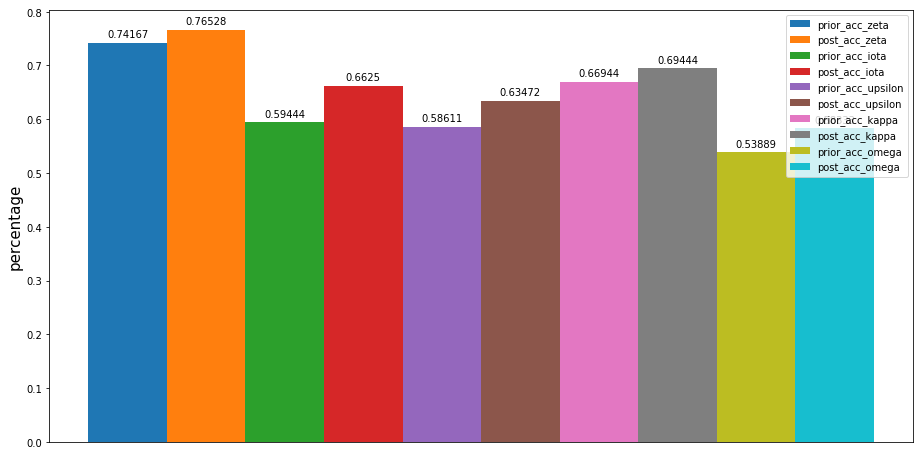

In [12]:
# specific rules 
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x = np.arange(1)
plt.rcParams.update({'font.size': 10})

width = 0.05
# print(len(prior_acc))

acc_values = [np.mean(prior_acc_zeta), 
              np.mean(post_acc_zeta),
              np.mean(prior_acc_iota), 
              np.mean(post_acc_iota),
              np.mean(prior_acc_upsilon), 
              np.mean(post_acc_upsilon),
              np.mean(prior_acc_kappa), 
              np.mean(post_acc_kappa),
              np.mean(prior_acc_omega), 
              np.mean(post_acc_omega)]

prior_acc_zeta_rect = ax.bar(x - 0.225, np.mean(prior_acc_zeta), width, label="prior_acc_zeta")
post_acc_zeta_rect = ax.bar(x - 0.175, np.mean(post_acc_zeta), width, label="post_acc_zeta")

prior_acc_iota_rect = ax.bar(x - 0.125, np.mean(prior_acc_iota), width, label="prior_acc_iota")
post_acc_iota_rect = ax.bar(x - 0.075, np.mean(post_acc_iota), width, label="post_acc_iota")

prior_acc_upsilon_rect = ax.bar(x - 0.025, np.mean(prior_acc_upsilon), width, label="prior_acc_upsilon")
post_acc_upsilon_rect = ax.bar(x + 0.025, np.mean(post_acc_upsilon), width, label="post_acc_upsilon")

prior_acc_kappa_rect = ax.bar(x + 0.075, np.mean(prior_acc_kappa), width, label="prior_acc_kappa")
post_acc_kappa_rect = ax.bar(x + 0.125, np.mean(post_acc_kappa), width, label="post_acc_kappa")

prior_acc_omega_rect = ax.bar(x + 0.175, np.mean(prior_acc_omega), width, label="prior_acc_omega")
post_acc_omega_rect = ax.bar(x + 0.225, np.mean(post_acc_omega), width, label="post_acc_omega")


# print(prior_match_perc)


# print(acc_values)
                       
rects = [prior_acc_zeta_rect,
         post_acc_zeta_rect,
         prior_acc_iota_rect,
         post_acc_iota_rect,
         prior_acc_upsilon_rect,
         post_acc_upsilon_rect,
         prior_acc_kappa_rect,
         post_acc_kappa_rect,
         prior_acc_omega_rect,
         post_acc_omega_rect]


# print(rects)

def autolabel(rects, ind, sign = 1, mult=1.01):
   
    i = 0
    for rect in rects:
#         print('hi')
        height = rects[i].get_height()
        ax.text(rects[i].get_x() + rect.get_width()/2., mult*sign*height,
                round(acc_values[ind],5),
                ha='center', va='bottom')
        i+= 1

autolabel(rects[0],0)
autolabel(rects[1],1)
autolabel(rects[2],2)
autolabel(rects[3],3)
autolabel(rects[4],4)
autolabel(rects[5],5)
autolabel(rects[6],6)
autolabel(rects[7],7)
autolabel(rects[8],8)
autolabel(rects[9],9)



ax.set_ylabel('percentage', size=15, color="black")
plt.tick_params(
    axis='x',          # changes apply to the x-axis\n",
    which='both',      # both major and minor ticks are affected\n",
    bottom=False,      # ticks along the bottom edge are off\n",
    top=False,         # ticks along the top edge are off\n",
    labelbottom=False)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.legend()
fig.tight_layout()
plt.savefig('summary_res_exp_1_specific_rules.pdf')  


0.6261111111111111
0.2250931232405064
0.6680555555555555
0.23191933554248065
WilcoxonResult(statistic=6792.5, pvalue=1.1188346529789235e-05)
NormaltestResult(statistic=17.684211655065475, pvalue=0.0001445180958390056)
NormaltestResult(statistic=103.888705175274, pvalue=2.759651907284361e-23)


TypeError: len() takes exactly one argument (0 given)

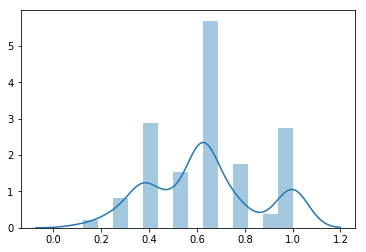

In [13]:
from scipy import stats
from statistics import mean, stdev 
prior_acc_list = [acc for sublist in prior_acc for acc in sublist]

post_acc_list = [acc for sublist in post_acc for acc in sublist]
print(mean(prior_acc_list))
print(stdev(prior_acc_list))
print(mean(post_acc_list))
print(stdev(post_acc_list))
print(stats.wilcoxon(prior_acc_list,post_acc_list))
print(stats.normaltest(prior_acc_list))
print(stats.normaltest(post_acc_list))
import seaborn as sns
sns.distplot(prior_acc_list)
# sns.distplot(post_acc_list)
print(len())

In [13]:
f = [True,True]
l = []
[l.append(1) for i in f if i is True]
print(l)

[1, 1]


In [14]:
print(isinstance(False, str))

False


In [15]:
import math
math.e**(.5/float('inf')) / (math.e**(.5/float('inf')) + math.e**((1-.5)/float('inf')))

0.5

In [16]:
math.e**(.5/100000) / (math.e**(.5/100000) + math.e**((1-.5)/100000))

0.5

In [17]:
df_zendo['rule_name'].value_counts()[0]
print(df_zendo['rule_name'].mode()[0])
print(isinstance(df_zendo['rule_name'].mode()[0], str))

Iota
True


In [18]:
e = [1,6]
d = [1,1]
print(e+d)

[1, 6, 1, 1]


In [19]:
k = [[1,3],[4,4]]
print(np.mean(k))

3.0


In [7]:
dl =[i for sublist in d_low_acc for i in sublist]
dh =[i for sublist in d_high_acc for i in sublist]
pma =[i for sublist in prior_match_acc for i in sublist]
poma =[i for sublist in posterior_match_acc for i in sublist]
pmp =[i for sublist in prior_match_perc for i in sublist]
pomp =[i for sublist in posterior_match_perc for i in sublist]


print(stats.wilcoxon(pmp,pomp))
print(stats.wilcoxon(pma,poma))
print(stats.wilcoxon(dl,dh))
print(np.mean(pmp))
print(np.mean(pomp))
print(np.mean(pma))
print(np.mean(poma))
print(np.mean(dl))
print(np.mean(dh))

print(np.std(pmp))
print(np.std(pomp))
print(np.std(pma))
print(np.std(poma))
print(np.std(dl))
print(np.std(dh))

NameError: name 'd_low_acc' is not defined

0.59125


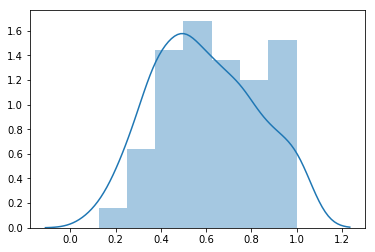

In [21]:
import seaborn as sns
sns.distplot(pmp)
print(np.mean(pmp))

0.71125


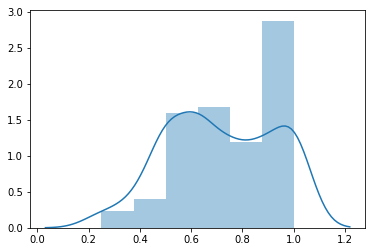

In [22]:
sns.distplot(pomp)
print(np.mean(pomp))

In [23]:
print(np.mean(pma))

0.45875


In [24]:
print(stats.mode(dl))
print(stats.mode(dh))

ModeResult(mode=array([0.]), count=array([117]))
ModeResult(mode=array([0.]), count=array([151]))


In [25]:
print([1,1,1,1,0,0,0,0] * 5)

[1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]


ValueError: not enough values to unpack (expected 2, got 1)

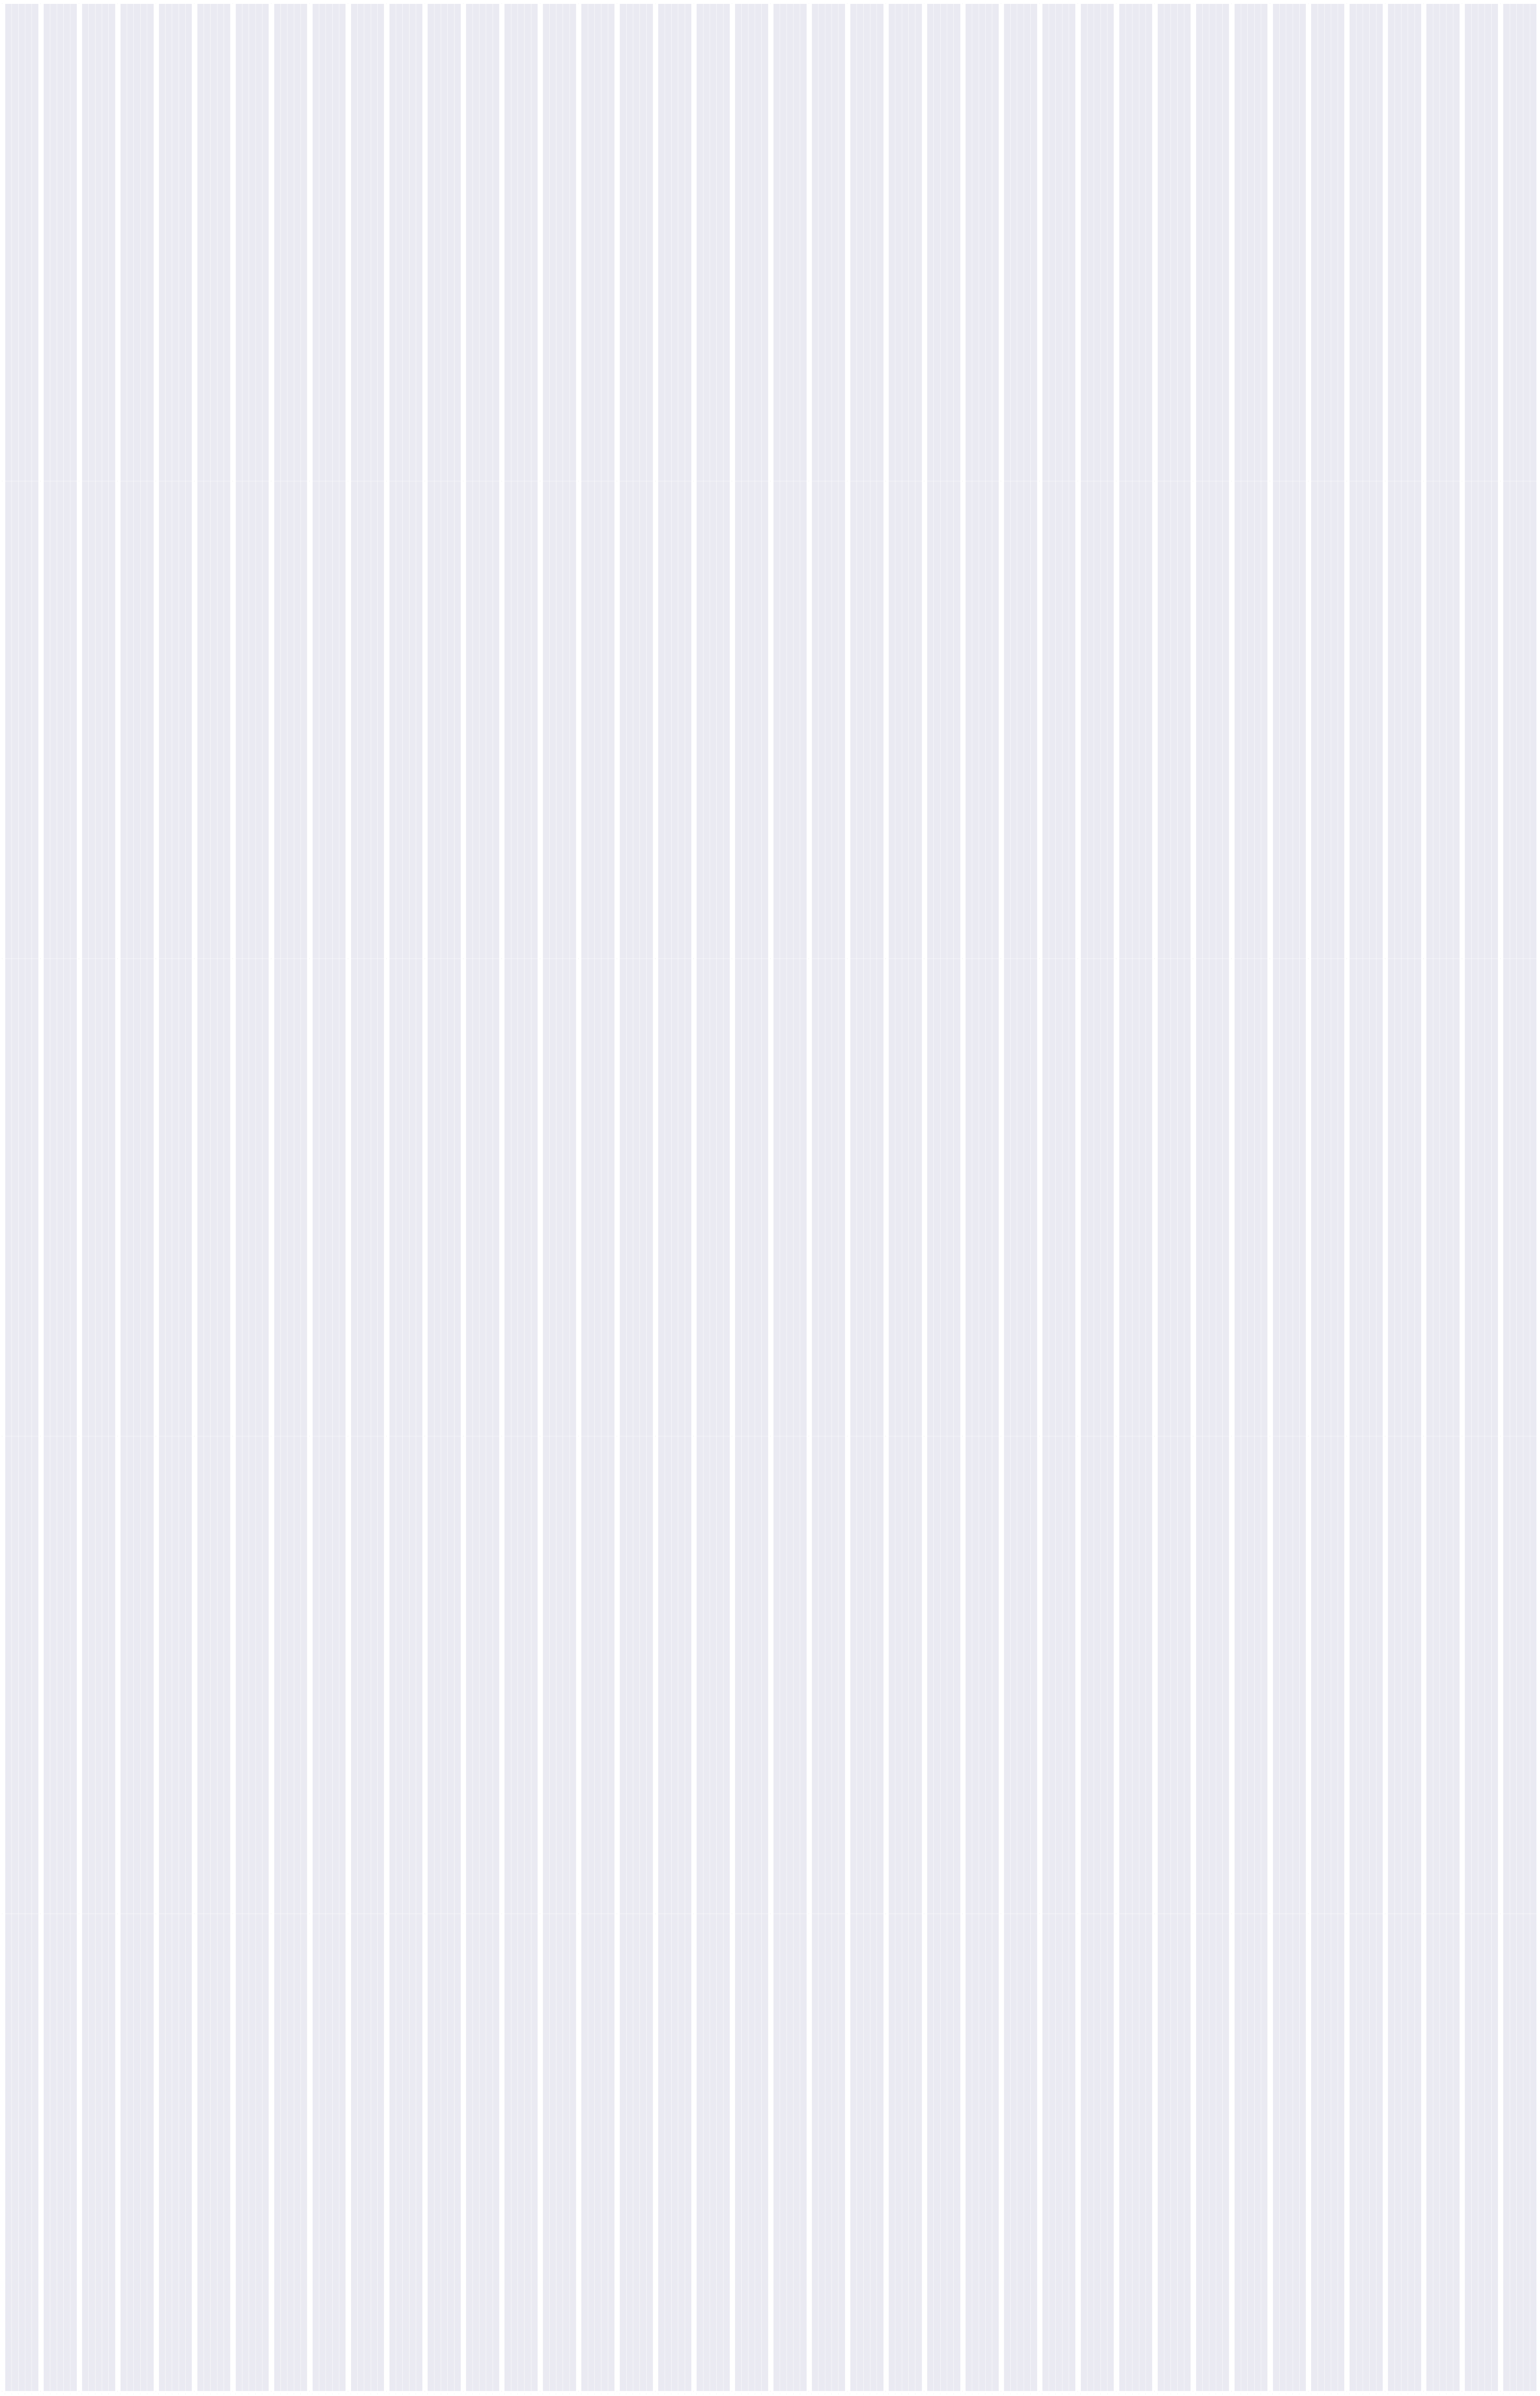

In [35]:
k=[[1,3]] * 2

In [36]:
print(len(k))

2


In [4]:
df_zendo = pd.read_csv('main_data_formatted_cond_3.csv')
from statistics import mean, stdev

In [6]:
print(len(df_zendo['prior']))

450


In [25]:
from statistics import mean, stdev
age = []
time = []
for i in debrief_data:
    age.append(i['age'])
    time.append(int(i['task_duration']))
print(mean(age))
print(stdev(age))
print(mean(time))
print(stdev(time))

36.78021978021978
10.500584320040055
30.285714285714285
11.956667795080065


In [23]:
print(debrief_data[69])

{'_id': {'$oid': '5ef5fb52ee2b4900171e8de5'}, 'date': '2020-06-26T13:42:42.913Z', 'generalComment': 'This was an interesting experiment and quite different from what I usually come across.', 'age': 47, 'initial_strategy': 'I tried to test which triangles had the most effect on the outcome, and it usually regarded finding which of the large triangles had the most impact.', 'final_strategy': 'Once I had determined which triangles were important, I tried different variations involving those triangles.', 'engaging': '10', 'difficult': '5', 'task_duration': '30', 'pol_orient': '1', 'token_id': 'f1oqs', '__v': 0}
